In [62]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [63]:
import numpy as np
import scipy as sp
import sklearn as sk
import cartopy as cp
import xarray as xr
import pandas as pd
import cftime
import dateutil
import dask
#Use the 2 lines below if the notebook has a dark theme (to make labelling visible):
from jupyterthemes import jtplot
jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)
import matplotlib.pyplot as plt
#The following code resets the default plot size so you don't have to fiddle with figsize every time"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [64]:
#Need the following line to avoid hdf5 issues that prevent opening thee file
# https://stackoverflow.com/questions/49317927/errno-101-netcdf-hdf-error-when-opening-netcdf-file
%env HDF5_USE_FILE_LOCKING=FALSE

env: HDF5_USE_FILE_LOCKING=FALSE


In [65]:
#Load AIRI data 
from netCDF4 import Dataset
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num

In [66]:
from cartopy import config
import cartopy.crs as ccrs

from matplotlib import pyplot
import matplotlib.patches as mpatches

In [67]:
#There is no inbuilt xarray correlation function so I used Ryan Abernathey's functions from:
#https://rabernat.github.io/research_computing_2018/xarray-tips-and-tricks.html
#NANs will RUIN EVERYTHING. Drop all leading/trailing NaNs after making a seasonal mean.
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def correlation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

In [68]:
#YEARS OMITTED
'''
1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
1992, 1999, 2003, 2007, 2011
'''

'\n1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940\n1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983\n1992, 1999, 2003, 2007, 2011\n'

# Load AIRI Data

In [69]:
dataset_file = "pALLIN.nc"
airi_dat = xr.open_dataset(dataset_file, decode_times=False)
units, reference_date = airi_dat.time.attrs['units'].split('since')
airi_dat['time'] = pd.date_range(start=reference_date, periods=airi_dat.sizes['time'], freq='MS')
#This file's calendar isn't recognized when using xr.open_dataset. The above workaround is from: 
#https://stackoverflow.com/questions/55648630/how-to-decode-the-time-variable-while-using-xarray-to-load-a-netcdf-file
# "M" means "month end frequency" (see https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
precip = airi_dat['precip']

In [70]:
#Get precip anomalies
precip_clim = precip.groupby("time.month").mean("time")
precip_anomfull = precip.groupby("time.month") - precip_clim

In [71]:
precip_subset1 = precip_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
precip_subset2 = precip_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
precip_subset3 = precip_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
precip_subset4 = precip_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
precip_subset5 = precip_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
precip_subset6 = precip_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
precip_subset7 = precip_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
precip_subset8 = precip_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
precip_subset9 = precip_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
precip_subset10 = precip_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
precip_subset11 = precip_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
precip_subset12 = precip_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
precip_subset13 = precip_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
precip_subset13 = precip_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
precip_subset14 = precip_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
precip_subset15 = precip_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
precip_subset16 = precip_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
precip_subset17 = precip_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
precip_subset18 = precip_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
precip_subset19 = precip_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
precip_subset20 = precip_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
precip_subset21 = precip_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
precip_subset22 = precip_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
precip_subset23 = precip_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

precip_anom = xr.merge([precip_subset1, precip_subset2, precip_subset3, precip_subset4, precip_subset5, 
                   precip_subset6, precip_subset7, precip_subset8, precip_subset9, precip_subset10, 
                   precip_subset11, precip_subset12, precip_subset13, precip_subset14, precip_subset15, 
                   precip_subset16, precip_subset17, precip_subset18, precip_subset19, precip_subset20, 
                   precip_subset21, precip_subset22, precip_subset23])
precip_anomtemp = xr.Dataset.to_array(precip_anom)
precip_anom = precip_anom['precip']

# Load SST Data

In [72]:
dataset_url = "https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc"
sst_dat = xr.open_dataset(dataset_url)
sst = sst_dat['sst']

In [73]:
#Slice SST data to the same duration as precip and calculate monthly anomalies
sst_subset = sst.sel(time=slice('1871-01-30','2017-01-01'))
sst_clim = sst_subset.groupby('time.month').mean('time')
sst_anomfull = sst_subset.groupby("time.month")-sst_clim

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [74]:
sst_subset1 = sst_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
sst_subset2 = sst_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
sst_subset3 = sst_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
sst_subset4 = sst_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
sst_subset5 = sst_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
sst_subset6 = sst_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
sst_subset7 = sst_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
sst_subset8 = sst_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
sst_subset9 = sst_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
sst_subset10 = sst_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
sst_subset11 = sst_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
sst_subset12 = sst_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
sst_subset13 = sst_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
sst_subset13 = sst_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
sst_subset14 = sst_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
sst_subset15 = sst_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
sst_subset16 = sst_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
sst_subset17 = sst_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
sst_subset18 = sst_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
sst_subset19 = sst_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
sst_subset20 = sst_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
sst_subset21 = sst_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
sst_subset22 = sst_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
sst_subset23 = sst_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

sst_anomtemp = xr.merge([sst_subset1, sst_subset2, sst_subset3, sst_subset4, sst_subset5, 
                   sst_subset6, sst_subset7, sst_subset8, sst_subset9, sst_subset10, 
                   sst_subset11, sst_subset12, sst_subset13, sst_subset14, sst_subset15, 
                   sst_subset16, sst_subset17, sst_subset18, sst_subset19, sst_subset20, 
                   sst_subset21, sst_subset22, sst_subset23])
sst_anom = sst_anomtemp['sst']

# Seasonal Means

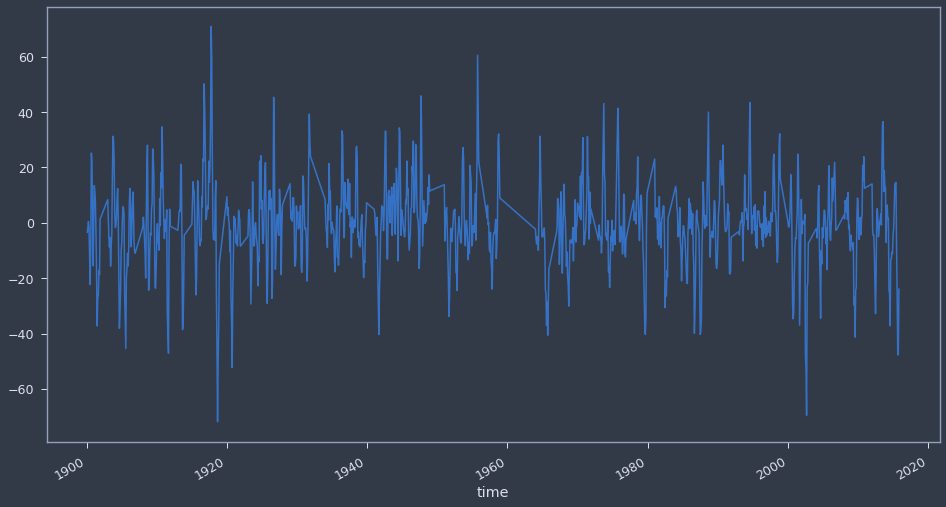

In [75]:
#Seasonal means of precip anomalies
precipa_seasonal = precip_anom.rolling(time=3,center=True).mean()
precipa_seasonal.plot()

In [76]:
#Seasonal means of SSTA
ssta_seasonal = sst_anom.rolling(time=3,center=True).mean()

# Correlations

In [77]:
#Try the same with only JJA:
march = np.arange(2,1056,12)
april = np.arange(3,1056,12)
may = np.arange(4,1056,12)

junes = np.arange(5,1056,12)
julys = np.arange(6,1056,12) #1752 instead of 1068
augusts = np.arange(7,1056, 12)
septembers = np.arange(8,1056,12)

ssta_march = sst_anom[march,:,:]
ssta_april = sst_anom[april,:,:]
ssta_may = sst_anom[may,:,:]

ssta_march.time.data = ssta_may.time.data
ssta_april.time.data = ssta_may.time.data

precipa_june = precip_anom[junes]
precipa_july = precip_anom[julys]
precipa_august = precip_anom[augusts]
precipa_september = precip_anom[septembers]

precipa_july.time.data = precipa_june.time.data
precipa_august.time.data = precipa_june.time.data
precipa_september.time.data = precipa_june.time.data

precipa_jjas = (precipa_june + precipa_july + precipa_august + precipa_september)

In [78]:
ssta_mam = ssta_march + ssta_april + ssta_may
ssta_may_mar = ssta_may - ssta_march
ssta_ma = ssta_march + ssta_april
ssta_am = ssta_april + ssta_may
ssta_may_apr = ssta_may - ssta_april
precipa_jjas.time.data = ssta_mam.time.data

In [79]:
#DR. BIN WANG
# DSST (20°S–5°N, 150°E-170°E)minus DSST (10°S–10°N, 110°W–80°W). EPT
# DSSTw(10°–25°S, 170°E–160°W)minus DSST (5°–20°N, 180°–150°W) CPT

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'Correlation Between May-March SSTA and JJAS AIRI Anomalies')

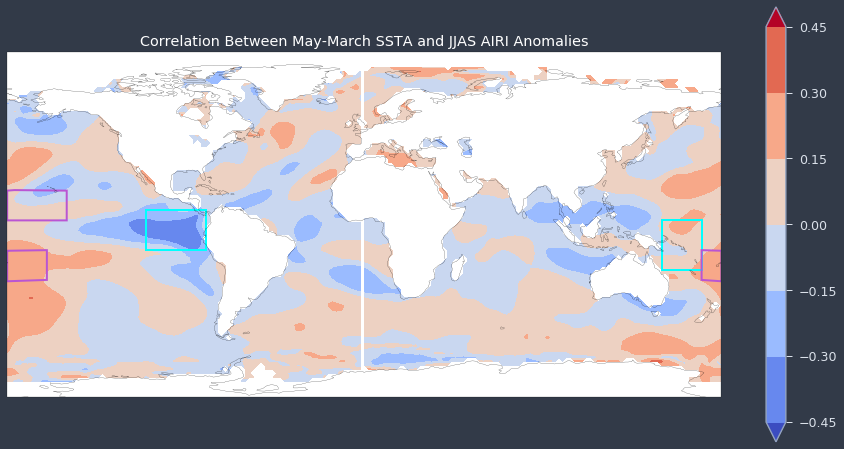

In [80]:
sst_may_mar_r = correlation(ssta_may_mar,precipa_jjas,dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
sst_may_mar_r.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[150,-20], width=20, height=25, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-110,-10], width=30, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[170,-25], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-180,5], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
plt.title('Correlation Between May-March SSTA and JJAS AIRI Anomalies', color = 'white')

Text(0.5, 1.0, 'Correlation Between May-April SSTA and JJAS AIRI Anomalies')

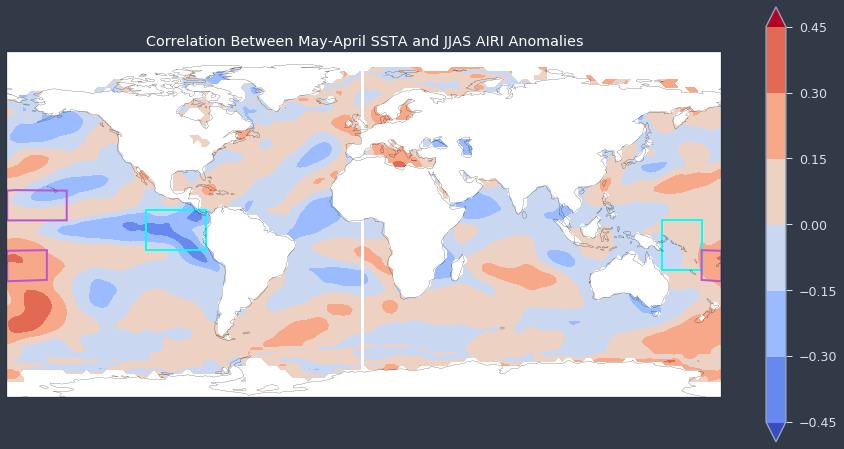

In [81]:
sst_may_apr_r = correlation(ssta_may_apr,precipa_jjas,dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
sst_may_apr_r.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[150,-20], width=20, height=25, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-110,-10], width=30, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[170,-25], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-180,5], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
plt.title('Correlation Between May-April SSTA and JJAS AIRI Anomalies', color = 'white')

# Boxes Being Tested

Text(0.5, 1.0, 'Correlation Between MarchAprilMay SSTA and JJAS AIRI Anomalies, predictor 1')

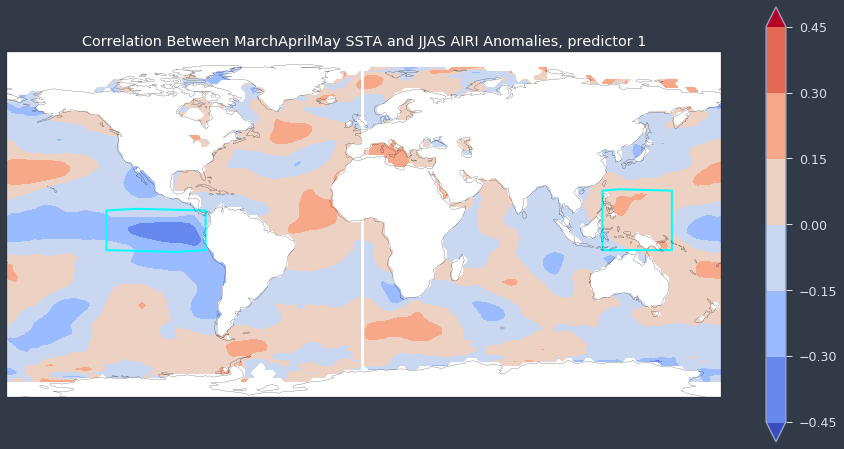

In [82]:
sst_mam_r = correlation(ssta_mam,precipa_jjas,dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
sst_mam_r.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[-130,-10], width=50, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(10s-10n, 130-80w)
ax.add_patch(mpatches.Rectangle(xy=[120,-10], width=35, height=30, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(10s-20n, 120-155e)
plt.title('Correlation Between MarchAprilMay SSTA and JJAS AIRI Anomalies, predictor 1', color = 'white')

Text(0.5, 1.0, 'Correlation Between May-April SSTA and JJAS AIRI Anomalies, predictor 2')

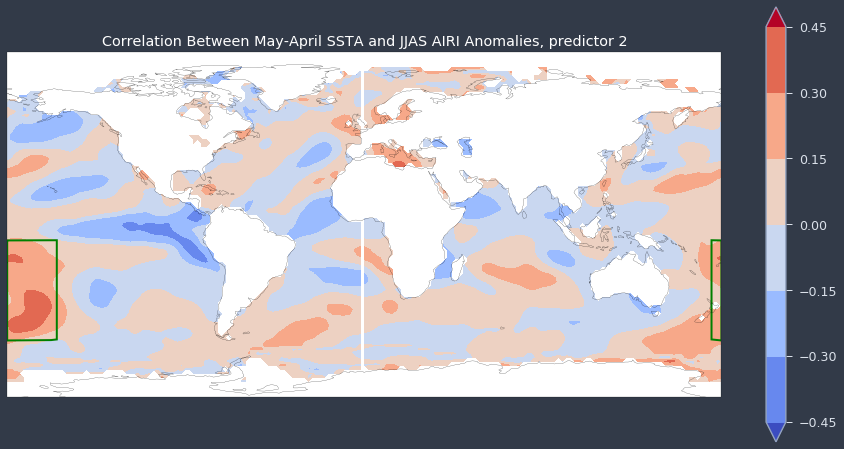

In [83]:
sst_may_apr_r = correlation(ssta_may_apr,precipa_jjas,dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
sst_may_apr_r.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[175,-55], width=30, height=50, facecolor=None, edgecolor='green', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(55-5s, 175e-155w)
plt.title('Correlation Between May-April SSTA and JJAS AIRI Anomalies, predictor 2', color = 'white')

Text(0.5, 1.0, 'Correlation Between May-March SSTA and JJAS AIRI Anomalies')

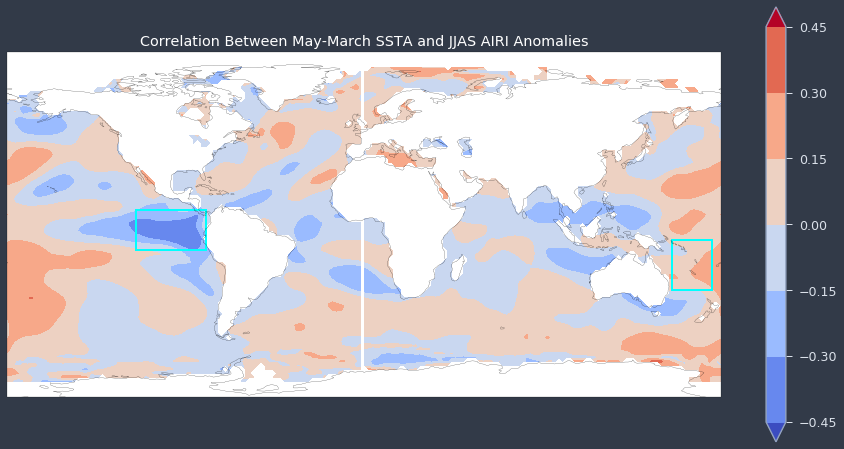

In [84]:
sst_may_mar_r = correlation(ssta_may_mar,precipa_jjas,dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
sst_may_mar_r.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[155,-30], width=20, height=25, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(5-30s, 155-175e)
ax.add_patch(mpatches.Rectangle(xy=[-115,-10], width=35, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(10n-10s, 115-80w)
plt.title('Correlation Between May-March SSTA and JJAS AIRI Anomalies', color = 'white')

Text(0.5, 1.0, 'Correlation Between May-March SSTA and JJAS AIRI Anomalies')

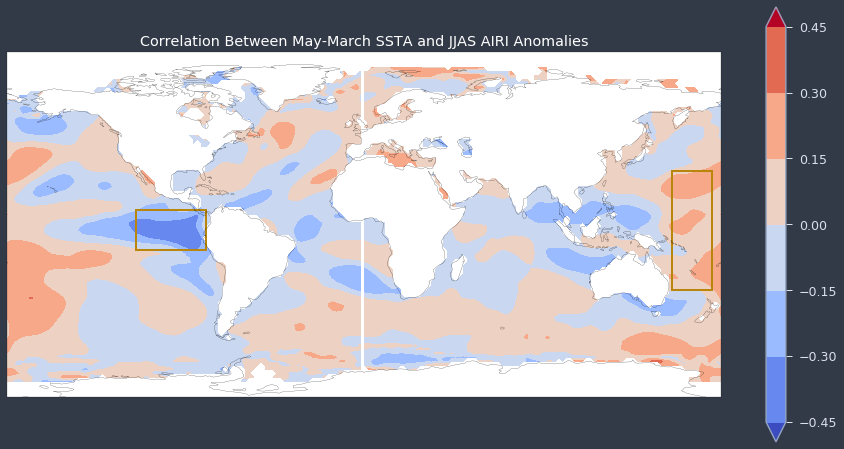

In [85]:
sst_may_mar_r = correlation(ssta_may_mar,precipa_jjas,dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
sst_may_mar_r.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[155,-30], width=20, height=60, facecolor=None, edgecolor='darkgoldenrod', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(30n-30s, 155-175e)
ax.add_patch(mpatches.Rectangle(xy=[-115,-10], width=35, height=20, facecolor=None, edgecolor='darkgoldenrod', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(10n-10s, 115-80w)
plt.title('Correlation Between May-March SSTA and JJAS AIRI Anomalies', color = 'white')

# Before and After 
(boxes shifted to center the correlations better)

Text(0.5, 1.0, 'Correlation Between May-March SSTA and JJAS AIRI Anomalies EPT')

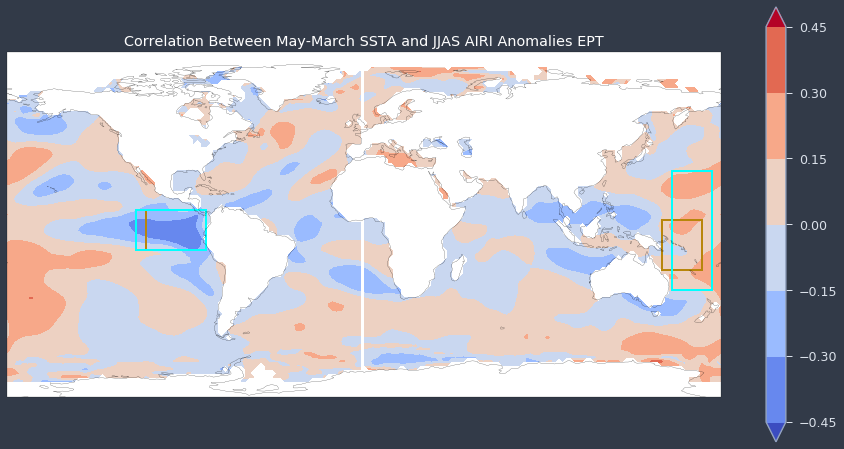

In [86]:
sst_may_mar_r = correlation(ssta_may_mar,precipa_jjas,dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
sst_may_mar_r.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[150,-20], width=20, height=25, facecolor=None, edgecolor='darkgoldenrod', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-110,-10], width=30, height=20, facecolor=None, edgecolor='darkgoldenrod', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[155,-30], width=20, height=60, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(30n-30s, 155-175e)
ax.add_patch(mpatches.Rectangle(xy=[-115,-10], width=35, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(10n-10s, 115-80w)
plt.title('Correlation Between May-March SSTA and JJAS AIRI Anomalies EPT', color = 'white')

Text(0.5, 1.0, 'Correlation Between May-April SSTA and JJAS AIRI Anomalies CPT')

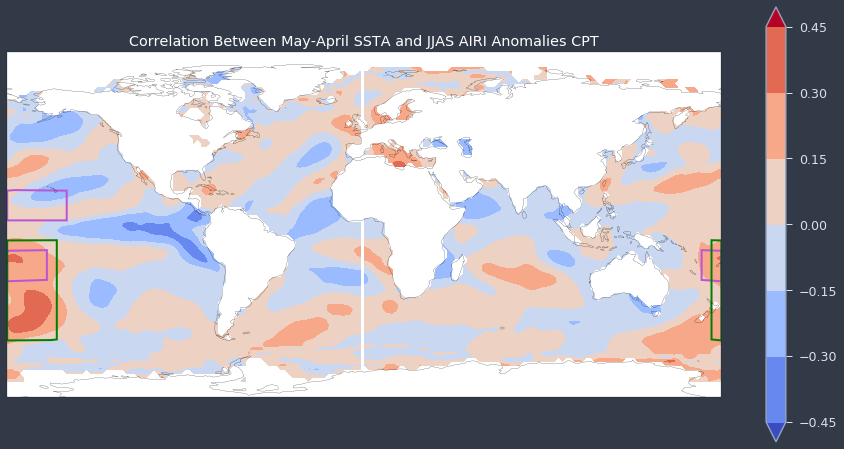

In [87]:
sst_may_apr_r = correlation(ssta_may_apr,precipa_jjas,dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
sst_may_apr_r.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[170,-25], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-180,5], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[175,-55], width=30, height=50, facecolor=None, edgecolor='green', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(55-5s, 175e-155w)
plt.title('Correlation Between May-April SSTA and JJAS AIRI Anomalies CPT', color = 'white')

In [88]:
# Copyright (c) 2020 Medha Palavalli.